In [1]:
import os, sys, time, random
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
print(os.getcwd())

/Users/jan/git/nudgebg/egvinsulin/notebooks/understand-dana-dataset


This was exported using a google doc script
```
function listFolderContents() {
  var foldername = 'Dana'; // provide the name of Folder from which you want to get the list of files
  var ListOfFiles = 'ListOfFiles_' + foldername;
  
  var folders = DriveApp.getFoldersByName(foldername)
  var folder = folders.next();
  var contents = folder.getFiles();
  
  var ss = SpreadsheetApp.create(ListOfFiles);
  var sheet = ss.getActiveSheet();
  sheet.appendRow( ['name', 'link','sizeInMB'] );
  
  var var_file;
  var var_name;
  var var_link;
  var var_size;

  while(contents.hasNext()) {
    var_file = contents.next();
    var_name = var_file.getName();
    var_link = var_file.getUrl();
    var_size=var_file.getSize()/1024.0/1024.0;
    sheet.appendRow( [var_name, var_link,var_size] );     
  }  
};
```


In [2]:
df = pd.read_csv('ListOfFiles_Dana - Tabellenblatt1.csv')
df.sizeInMB.sum()
display(df.head())
print(f"Overall data set comprises {df.shape[0]} patients with a total of {df.sizeInMB.sum()/1024:.2f} gigabytes of data")

,name,link,sizeInMB
0,49182092.zip,https://drive.google.com/file/d/1vVP2gJ2VcyE1-...,661.210233
1,79751050.zip,https://drive.google.com/file/d/1vaCgpfvkfRuKQ...,801.721233
2,39182506.zip,https://drive.google.com/file/d/1vS_zu3S82dVUg...,559.593849
3,07613176.zip,https://drive.google.com/file/d/1vMyPhziAALCFj...,507.594690
4,93230373.zip,https://drive.google.com/file/d/1vbMVsOW27FNxK...,228.912692


Overall data set comprises 228 patients with a total of 164.47 gigabytes of data


## look at data set distribution

Text(0, 0.5, 'number of datasets')

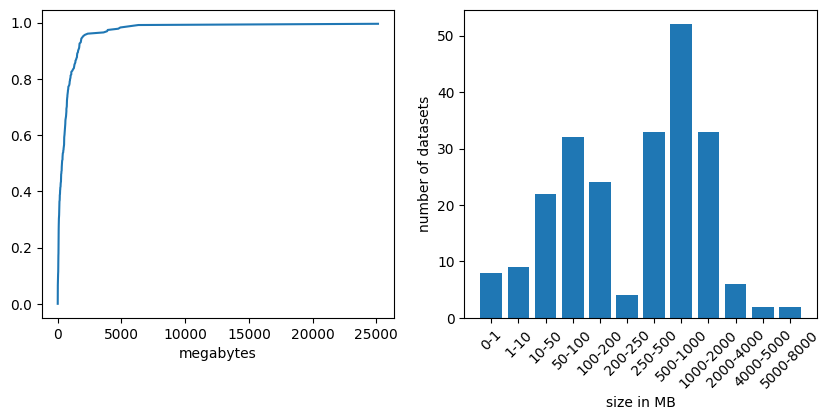

In [5]:
f,AX = plt.subplots(1,2,figsize=(10,4))

#getting the CDF
Z = df.sizeInMB
N = len(Z)
X = np.sort(Z)
F = np.array(range(N))/float(N)
ax = AX[0]
ax.plot(X,F)
ax.set_xlabel('megabytes')

#histogram
bins  = [0,1,10,50,100,200,250,500,1000,2000,4000,5000,8000]
f,x = np.histogram(Z,bins=bins)
pairs = list(zip(bins[:-1:],bins[1::]))
ticklabels = list(map(lambda x: f"{x[0]}-{x[1]}",pairs))

ax = AX[1]
ax.bar(np.arange(len(bins)-1), f)
plt.xticks(np.arange(len(bins)-1), ticklabels,rotation=45)
ax.set_xlabel('size in MB')
ax.set_ylabel('number of datasets')

## inspect zip files

In [42]:
import glob
import re
def read_all_zips(data_dir):
    """get paths for fully numerically named zip archives in path."""
    file_paths = glob.glob(str(data_dir) + "/*.zip")
    return [path for path in file_paths if re.search("^\d+\.zip$", os.path.basename(path)) ]

data_path = os.path.join(os.getcwd(),'../..','data','raw','open human')
zip_paths = read_all_zips(data_path)
df = pd.DataFrame({'archive':[os.path.basename(path) for path in zip_paths],
                   'zip_paths':zip_paths})
display(df.head())

,archive,zip_paths
0,66836068.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...
1,85078542.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...
2,51622121.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...
3,20777653.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...
4,27553507.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...


## How much OpenAPS vs. Nightscout data do we have?
The datasets come from the open humans project and were uploaded either through nightscout data commons or the open aps data commons project. Using either the *Nightscout data transfer app*: This uploads profile.json, entries.json, treatments.json, and devicestatus.json which end up in a **direct-sharing31** or the *Android APS Uploader*: This uploads data directly from the AndroidAPS application. This data ends up in a **direct-sharing396** folder. Let's look at how many of the datasets have nightscout or AndroidAPS data.

In [ ]:
def getBasePath(zip_path, origin_id):
    with zipfile.ZipFile(zip_path) as archive:
        base_path = f"direct-sharing-{origin_id}/"
        patient_id = os.path.basename(archive.filename).split('.')[0]
        if patient_id == archive.filelist[0].filename.split('/')[0]:
            base_path = f"{patient_id}/{base_path}"
        return base_path if base_path in archive.namelist() else None

 
#let's try it out
zip_path = df.zip_paths.loc[df.archive=='42360672.zip'].values[0]
print(getBasePath(zip_path,31),getBasePath(zip_path,396))

#let's try it out
zip_path = df.zip_paths.loc[df.archive=='86025410.zip'].values[0]
print(getBasePath(zip_path,31),getBasePath(zip_path,396))


In [101]:
df["openAPS"] = df.zip_paths.apply(lambda x: getBasePath(x,396))
df["nightscout"] = df.zip_paths.apply(lambda x: getBasePath(x,31))
display(df.head(10))

,archive,zip_paths,openAPS,nightscout
0,66836068.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/
1,85078542.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,direct-sharing-396/,None
2,51622121.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,None
3,20777653.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,direct-sharing-396/,None
4,27553507.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,direct-sharing-396/,None
5,24587372.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/
6,28756888.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/
7,86298207.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,direct-sharing-396/,None
8,97099623.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,direct-sharing-396/,None
9,07613176.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,07613176/direct-sharing-396/,07613176/direct-sharing-31/


<div class="alert alert-block alert-warning"> Most archives have their data in a direct-sharingXXX folder but some such as 42360672.zip have the direct-sharing folders within a patient id folder</div>

In [192]:
hasNightScout = ~df.nightscout.isna()
hasOpenAPS = ~df.openAPS.isna()
hasBoth = (hasNightScout & hasOpenAPS)
hasNone = (~ (hasNightScout | hasOpenAPS))
print(f"{hasNightScout.sum()} archives have nightscout data, {hasOpenAPS.sum()} have open APS data, {hasBoth.sum()} have both, {hasNone.sum()} have none")
display(df.loc[hasBoth])
display(df.loc[hasNone])

33 archives have nightscout data, 21 have open APS data, 5 have both, 1 have none


,archive,zip_paths,openAPS,nightscout
9,07613176.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,07613176/direct-sharing-396/,07613176/direct-sharing-31/
11,49182092.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,49182092/direct-sharing-396/,49182092/direct-sharing-31/
27,42360672.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,42360672/direct-sharing-396/,42360672/direct-sharing-31/
34,02611986.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,direct-sharing-396/,direct-sharing-31/
42,02050717.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,direct-sharing-396/,direct-sharing-31/


,archive,zip_paths,openAPS,nightscout
2,51622121.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,None


## Other direct-sharing folders
Are there any direct-sharing folders in the 51622121.zip?
<div>
<img src="51622121.png" width="500"/>
</div>

In [211]:
#we can find them using regular expressions
#re.search(r"^(\d+/)?direct-sharing-(\d{2,3})/$", "1/direct-sharing-133")
def getAnyDirectSharingFolder(zip_path):
    with zipfile.ZipFile(zip_path) as archive:
        regex = r"^(?:\d+/)?direct-sharing-(\d{2,3})/$"
        paths = [file for file in archive.namelist() if re.search(regex, file)]
    return paths
df.zip_paths.loc[hasNone].apply(lambda x: getAnyDirectSharingFolder(x))

2    [direct-sharing-133/, direct-sharing-351/]
Name: zip_paths, dtype: object

<div class="alert alert-block alert-warning"> Some archives contain a direct-sharing-133 and -351 folder, unclear how to deal with those and why they end up in 351.</div>

## Check for existing .gz archives
We know that each nightscout dataset should come with .gz files for treatments, profile, devicestatus and entries. Let's check if all arhives have these.

In [212]:
def getGZs(zip_path, dataType='treatments'):
    with zipfile.ZipFile(zip_path) as archive:
        base_path = getBasePath(zip_path,31)
        files = archive.namelist()
        files = [path for path in files if re.search(f"^{base_path}({dataType})([^/]*)\.gz$", path)]
        return None if len(files)==0 else files
        #return [path for path in files if re.search(f"^direct-sharing-31\/({dataType})([^/]*)\.gz$", path)]

df_nightscout = df.loc[hasNightScout].copy()
df_nightscout['treatment.gz'] = df_nightscout.zip_paths.apply(lambda x: getGZs(x,'treatments'))
df_nightscout['profile.gz'] = df_nightscout.zip_paths.apply(lambda x: getGZs(x,'profile'))
df_nightscout['devicestatus.gz'] = df_nightscout.zip_paths.apply(lambda x: getGZs(x,'devicestatus'))
df_nightscout['entries.gz'] = df_nightscout.zip_paths.apply(lambda x: getGZs(x,'entries'))
display(df_nightscout.head())

,archive,zip_paths,openAPS,nightscout,treatment.gz,profile.gz,devicestatus.gz,entries.gz
0,66836068.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/,[direct-sharing-31/treatments__to_2018-03-23.j...,[direct-sharing-31/profile__to_2018-03-23.json...,[direct-sharing-31/devicestatus__to_2018-03-23...,[direct-sharing-31/entries__to_2018-03-23.json...
5,24587372.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/,[direct-sharing-31/treatments.json.gz],[direct-sharing-31/profile.json.gz],[direct-sharing-31/devicestatus.json.gz],[direct-sharing-31/entries.json.gz]
6,28756888.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/,[direct-sharing-31/treatments__to_2019-03-09.j...,[direct-sharing-31/profile__to_2019-03-09.json...,[direct-sharing-31/devicestatus__to_2019-03-09...,[direct-sharing-31/entries__to_2019-03-09.json...
9,07613176.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,07613176/direct-sharing-396/,07613176/direct-sharing-31/,None,None,None,None
10,00309157.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/,[direct-sharing-31/treatments__to_2019-06-21.j...,[direct-sharing-31/profile__to_2019-06-21.json...,[direct-sharing-31/devicestatus__to_2019-06-21...,[direct-sharing-31/entries__to_2019-06-21.json...


In [213]:
bMissing = (df_nightscout.loc[:,["treatment.gz","profile.gz","devicestatus.gz","entries.gz"]].count(axis=1)!=4)
print(f"There are {bMissing.sum()} archives that miss at least one datatype .gz archive")
display(df_nightscout.loc[bMissing])

There are 1 archives that miss at least one datatype .gz archive


,archive,zip_paths,openAPS,nightscout,treatment.gz,profile.gz,devicestatus.gz,entries.gz
9,07613176.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,07613176/direct-sharing-396/,07613176/direct-sharing-31/,None,None,None,None


The 07613176 archive has no data. After extraction, this was confirmed. Some folders exist but no data.
<div>
<img src="07613176.png" width="500"/>
</div>
<div class="alert alert-block alert-warning"> Some archives seem to be missing data, unclear why.</div>

# Check CSVs
we know from inspection, that most archives come with extracted data (dana scripts) csv files, let's check

In [219]:
def getCSVs(zip_path, data_type):
    with zipfile.ZipFile(zip_path) as archive:
        patient_id = os.path.basename(archive.filename).split('.')[0]
        files = archive.namelist()
        paths = [file for file in files if re.search(f"^{patient_id}_{data_type}_(.+?)\.csv$",os.path.split(file)[1])]
        return None if len(paths)==0 else paths
#test for a random archive
getCSVs(zip_paths[0],'profile')

['direct-sharing-31/66836068_profile__to_2018-03-23_csv/66836068_profile__to_2018-03-23_aa.csv']

In [220]:
df_nightscout['treatment.csv'] = df_nightscout.zip_paths.apply(lambda x: getCSVs(x,'treatments'))
df_nightscout['profile.csv'] = df_nightscout.zip_paths.apply(lambda x: getCSVs(x,'profile'))
df_nightscout['devicestatus.csv'] = df_nightscout.zip_paths.apply(lambda x: getCSVs(x,'devicestatus'))
df_nightscout['entries.csv'] = df_nightscout.zip_paths.apply(lambda x: getCSVs(x,'entries'))

In [223]:
display(df_nightscout.loc[:,['treatment.csv','profile.csv','devicestatus.csv','entries.csv']].head(10))

,treatment.csv,profile.csv,devicestatus.csv,entries.csv
0,[direct-sharing-31/66836068_treatments__to_201...,[direct-sharing-31/66836068_profile__to_2018-0...,[direct-sharing-31/66836068_devicestatus__to_2...,[direct-sharing-31/66836068_entries__to_2018-0...
5,None,None,None,None
6,[direct-sharing-31/28756888_treatments__to_201...,[direct-sharing-31/28756888_profile__to_2019-0...,[direct-sharing-31/28756888_devicestatus__to_2...,[direct-sharing-31/28756888_entries__to_2019-0...
9,None,None,None,None
10,[direct-sharing-31/00309157_treatments__to_201...,[direct-sharing-31/00309157_profile__to_2019-0...,[direct-sharing-31/00309157_devicestatus__to_2...,[direct-sharing-31/00309157_entries__to_2019-0...
11,[49182092/direct-sharing-31/49182092_treatment...,[49182092/direct-sharing-31/49182092_profile__...,[49182092/direct-sharing-31/49182092_devicesta...,[49182092/direct-sharing-31/49182092_entries__...
12,[direct-sharing-31/13484299_treatments__to_201...,[direct-sharing-31/13484299_profile__to_2019-1...,[direct-sharing-31/13484299_devicestatus__to_2...,[direct-sharing-31/13484299_entries__to_2019-1...
13,[direct-sharing-31/86025410_treatments__to_201...,[direct-sharing-31/86025410_profile__to_2017-1...,[direct-sharing-31/86025410_devicestatus__to_2...,[direct-sharing-31/86025410_entries__to_2017-1...
14,[direct-sharing-31/81099003_treatments_2014-12...,[direct-sharing-31/81099003_profile_2014-12-14...,[direct-sharing-31/81099003_devicestatus_2014-...,[direct-sharing-31/81099003_entries_2014-12-14...
15,[direct-sharing-31/00897741_treatments_csv/008...,[direct-sharing-31/00897741_profile_csv/008977...,[direct-sharing-31/00897741_devicestatus_csv/0...,[direct-sharing-31/00897741_entries__to_2018-0...


In [225]:
bMissing = (df_nightscout.loc[:,["treatment.csv","profile.csv","devicestatus.csv","entries.csv"]].count(axis=1)!=4)
print(f"There are {bMissing.sum()} archives that don't have a csv for at least one datatype")
display(df_nightscout.loc[bMissing])

There are 7 archives that don't have a csv for at least one datatype


,archive,zip_paths,openAPS,nightscout,treatment.gz,profile.gz,devicestatus.gz,entries.gz,treatment.csv,profile.csv,devicestatus.csv,entries.csv
5,24587372.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/,[direct-sharing-31/treatments.json.gz],[direct-sharing-31/profile.json.gz],[direct-sharing-31/devicestatus.json.gz],[direct-sharing-31/entries.json.gz],None,None,None,None
9,07613176.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,07613176/direct-sharing-396/,07613176/direct-sharing-31/,None,None,None,None,None,None,None,None
19,93937579.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/,[direct-sharing-31/treatments__to_2018-06-30.j...,[direct-sharing-31/profile__to_2018-06-30.json...,[direct-sharing-31/devicestatus__to_2018-06-30...,[direct-sharing-31/entries__to_2018-06-30.json...,[direct-sharing-31/93937579_treatments__to_201...,[direct-sharing-31/93937579_profile__to_2018-0...,[direct-sharing-31/93937579_devicestatus_2018-...,None
27,42360672.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,42360672/direct-sharing-396/,42360672/direct-sharing-31/,[42360672/direct-sharing-31/treatments__to_201...,[42360672/direct-sharing-31/profile__to_2018-0...,[42360672/direct-sharing-31/devicestatus__to_2...,[42360672/direct-sharing-31/entries__to_2018-0...,[42360672/direct-sharing-31/42360672_treatment...,[42360672/direct-sharing-31/42360672_profile__...,[42360672/direct-sharing-31/42360672_devicesta...,None
36,32635618.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/,[direct-sharing-31/treatments.json.gz],[direct-sharing-31/profile.json.gz],[direct-sharing-31/devicestatus.json.gz],[direct-sharing-31/entries.json.gz],None,[direct-sharing-31/32635618_profile_csv/326356...,None,None
41,01884126.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/,[direct-sharing-31/treatments.json.gz],[direct-sharing-31/profile.json.gz],[direct-sharing-31/devicestatus.json.gz],[direct-sharing-31/entries.json.gz],None,None,None,None
46,99296581.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,None,direct-sharing-31/,[direct-sharing-31/treatments.json.gz],[direct-sharing-31/profile.json.gz],[direct-sharing-31/devicestatus.json.gz],[direct-sharing-31/entries.json.gz],[direct-sharing-31/99296581_treatments_csv/992...,[direct-sharing-31/99296581_profile_csv/992965...,[direct-sharing-31/99296581_devicestatus_csv/9...,None


In [226]:
df_nightscout.loc[df_nightscout.archive=='42360672.zip']

,archive,zip_paths,openAPS,nightscout,treatment.gz,profile.gz,devicestatus.gz,entries.gz,treatment.csv,profile.csv,devicestatus.csv,entries.csv
27,42360672.zip,/Users/jan/git/nudgebg/egvinsulin/notebooks/un...,42360672/direct-sharing-396/,42360672/direct-sharing-31/,[42360672/direct-sharing-31/treatments__to_201...,[42360672/direct-sharing-31/profile__to_2018-0...,[42360672/direct-sharing-31/devicestatus__to_2...,[42360672/direct-sharing-31/entries__to_2018-0...,[42360672/direct-sharing-31/42360672_treatment...,[42360672/direct-sharing-31/42360672_profile__...,[42360672/direct-sharing-31/42360672_devicesta...,None


## Missing extracted csv files
42360672 does not seem to contain entries data. After extraction, this was confirmed. 42360672 for example has a entries.gz archive but no extracted csv files for entries. After running the dana scrips again, the entries files were successfully extracted.  

<div>
<img src="42360672.png" width="500"/>
</div>
<div class="alert alert-block alert-warning"> Some archives were not successfully extracted as it seems. </div>


## CSV Folders
We can see that the csvs are sometimes stored in a folder that ends with .json_csv, sometimes it ends with just _csv

<div>
<img src="28756888.png" width="500"/>
</div>
<div>
<img src="24587372.png" width="500"/>
</div>
<div class="alert alert-block alert-warning"> CSVs folder names differ</div>
